In [3]:
#Author: Christine Nguyen 

#Exploratory Data Analysis: Reading in real-estate sales data for single family homes in RVP, California. 
#Basic data exploration like looking at distributions, correlations amongst continous variables and 
#associations between categorical variables. The purpose of doing this is to reduce features, and 
#see how much of the data is usable before cleaning and preprocessing.


import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
#read in data

# sales = pd.read_csv('insert_path_to_file_here')
sales = pd.read_pickle('sales.pkl')  

In [5]:
numerical = [
'BathroomsTotalInteger',
'BedroomsTotal',
'ClosePrice',
'ListPrice',
'LotSizeSquareFeet',
'ParkingTotal',
'PhotosCount',
'LivingArea',
'YearBuilt',
'CloseDate',
]

In [67]:
categorical = [
'AttachedGarageYN',
'CoolingYN',
'FireplaceYN',
'HeatingYN',
'HighSchoolDistrict',
'InternetEntireListingDisplayYN',
'LaundryYN',
'LivingArea',
'MLSAreaMajor',
'ParkingYN',
'PatioYN',
'PoolPrivateYN',
'PropertySubType',
'PropertyType',
'SignOnPropertyYN',
'SpaYN',
'SprinklersYN',
'ViewYN',
'VirtualTourURLUnbranded',
'Zoning'
]

In [4]:
sales.head()

,LotSizeAcres,PrivateRemarks,Appliances,AppliancesYN,MLSAreaMajor,Assessments,AssessmentsYN,ParcelNumber,AssociationFee,AssociationYN,PropertyAttachedYN,AutoSoldYN,BathroomsTotalInteger,BathroomsFull,BathroomsFullAndThreeQuarter,BathroomsThreeQuarter,BedroomsTotal,City,CommonWalls,CommunityFeatures,ConcessionsAmount,ConcessionsComments,ContactOrder1,ContactOrder2,ContactOrder3,ContactOrder4,Cooling,CoolingYN,Country,CountyOrParish,CumulativeDaysOnMarket,CurrentPrice,CloseDate,EndingDate,PurchaseContractDate,ListingContractDate,ExpirationDate,OffMarketDate,OnMarketDate,ContractStatusChangeDate,StatusPriceChangeTimestamp,DaysOnMarket,DeletedYN,DualVariableCompensationYN,EatingArea,BuyerFinancing,FireplaceYN,FireplaceFeatures,Flooring,AttachedGarageYN,GarageSpaces,Heating,HeatingYN,InteriorFeatures,InternetAddressDisplayYN,InternetEntireListingDisplayYN,LockBoxLocation,LockBoxType,LandLeaseYN,Latitude,LaundryFeatures,LaundryYN,LeaseConsideredYN,ListPrice,OriginalListPrice,ListAgentAOR,ListAgentMobilePhone,ListAgentDirectPhone,ListAgentEmail,ListAgentFax,ListAgentFirstName,ListAgentHomePhone,ListAgentKeyNumeric,ListAgentLastName,ListAgentMainOfficeKeyNumeric,ListAgentMainOfficeMlsId,ListAgentMlsId,ListAgentStateLicense,ListOfficeAOR,ListOfficeFax,ListOfficeKeyNumeric,ListOfficeMlsId,ListOfficeName,ListOfficePhone,ListingTerms,Longitude,LotFeatures,TaxLot,LotSizeArea,LotSizeUnits,LotSizeSource,LotSizeSquareFeet,LotSizeUnits_3,Matrix_Unique_ID,OriginatingSystemID,ListingId,GarageSpaces_5,ParkingTotal,GarageSpaces_7,ParkingTotal_8,OccupantType,OnMarketTimestamp,OpenHouseCount,ParkingFeatures,ParkingTotal_10,ParkingYN,PatioAndPorchFeatures,PatioYN,PhotosChangeTimestamp,PhotosCount,PoolFeatures,PoolPrivateYN,Possession,PreviousStandardStatus,PricePerSquareFoot,PublicRemarks,PropertyType,PropertySubType,Roof,RoomType,SpecialListingConditions,HighSchoolDistrict,BuyerAgentAOR,BuyerAgentStateLicense,BuyerAgentFirstName,BuyerAgentLastName,BuyerAgentMainOfficeMlsId,BuyerAgentMainOfficeKeyNumeric,BuyerAgentKeyNumeric,BuyerAgentMlsId,BuyerOfficeAOR,BuyerOfficeMlsId,BuyerAgencyCompensation,BuyerAgencyCompensationNumber,BuyerAgencyCompensationType,BuyerOfficeKeyNumeric,BuyerOfficeName,ClosePrice,SeniorCommunityYN,ListingService,ShowingContactName,ShowingContactPhone,ShowingContactType,ShowingInstructions,SignOnPropertyYN,LivingArea,LivingAreaSource,StateOrProvince,StandardStatus,Levels,StreetName,StreetNumberNumeric,StreetSuffix,DocumentsCount,Table,ModificationTimestamp,OffMarketTimestamp,OriginalEntryTimestamp,StatusChangeTimestamp,TaxTractNumber,View,ViewYN,InternetAutomatedValuationDisplayYN,InternetConsumerCommentYN,WaterSource,YearBuilt,YearBuiltSource,PostalCode,PostalCodePlus4,SpaYN,VirtualTourURLUnbranded,SprinklersYN,CountyOrParish,StreetNumber,StreetSuffixModifier,StreetDirSuffix,Zoning,StreetDirPrefix
0,NaN,"Trust Sale. Property is sold in ""as is"" condi...",Microwave,1.0,NaN,NaN,NaN,7.572011e+09,1150.0,1.0,NaN,0.0,2,2.0,2.0,0.0,3,Rancho Palos Verdes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Air,1.0,NaN,Los Angeles,34,1225000.0,43951.0,43951.0,43919.0,43885,43975.0,43951.0,43885,43951.0,43951.463299,34.0,False,NaN,NaN,NaN,1.0,Family Room,Wood,NaN,NaN,Central,1.0,NaN,1.0,True,Front Door,Supra,NaN,33.747283,Inside,1.0,NaN,1275000,1425000.0,Beverly Hills/Greater LA,323-683-5100,323-683-5100,mark@cremgroupre.com,NaN,Mark,NaN,102224181.0,Cianciulli,252337066.0,CLW-X81875,CLW-C123197,1990266.0,NaN,NaN,252337066.0,CLW-X81875,The CREM Group,323-347-1009,"Cash, Conventional",-118.366280,NaN,NaN,35632.0,Square Feet,NaN,35632.0,Square Feet,329899833,CLAW,20559496,NaN,NaN,NaN,NaN,Vacant,43948.630035,0,"Driveway, Garage",NaN,1.0,NaN,NaN,43954.443113,2,None,0.0,NaN,NaN,758.51,This 1955 original ranch style home is located...,Residential,Single Family Residence,NaN,Family Room,Standard,NaN,NaN,1376549,Greg,Roberts,CLW-1521110,NaN,26045015.0,SROBEGRE,NaN,CLW-MRM-SB1356240,2.5,2.5,%,NaN,Coldwell Banker Realty,1225000.0,0.0,Full Service,NaN,NaN,NaN,"Su

In [59]:
# for i in sales.columns:
#     print(i)

## Basic overview of data

In [118]:
#the describe function is a great way for us to get a quick overview of what the data looks like
sales.describe()

,LotSizeAcres,AppliancesYN,AssessmentsYN,ParcelNumber,AssociationFee,AssociationYN,PropertyAttachedYN,AutoSoldYN,BathroomsTotalInteger,BathroomsFull,BathroomsFullAndThreeQuarter,BathroomsThreeQuarter,BedroomsTotal,ConcessionsAmount,CoolingYN,CumulativeDaysOnMarket,CurrentPrice,CloseDate,EndingDate,PurchaseContractDate,ListingContractDate,ExpirationDate,OffMarketDate,OnMarketDate,ContractStatusChangeDate,StatusPriceChangeTimestamp,DaysOnMarket,DualVariableCompensationYN,FireplaceYN,AttachedGarageYN,GarageSpaces,HeatingYN,InternetAddressDisplayYN,LandLeaseYN,Latitude,LaundryYN,LeaseConsideredYN,ListPrice,OriginalListPrice,ListAgentKeyNumeric,ListAgentMainOfficeKeyNumeric,ListAgentStateLicense,ListOfficeKeyNumeric,Longitude,LotSizeArea,LotSizeSquareFeet,Matrix_Unique_ID,GarageSpaces_5,ParkingTotal,GarageSpaces_7,ParkingTotal_8,OnMarketTimestamp,OpenHouseCount,ParkingTotal_10,ParkingYN,PatioYN,PhotosChangeTimestamp,PhotosCount,PoolPrivateYN,PricePerSquareFoot,BuyerAgentMainOfficeKeyNumeric,BuyerAgentKeyNumeric,BuyerAgencyCompensation,BuyerAgencyCompensationNumber,BuyerOfficeKeyNumeric,ClosePrice,SeniorCommunityYN,SignOnPropertyYN,LivingArea,StreetNumberNumeric,DocumentsCount,ModificationTimestamp,OffMarketTimestamp,OriginalEntryTimestamp,StatusChangeTimestamp,ViewYN,InternetAutomatedValuationDisplayYN,InternetConsumerCommentYN,YearBuilt,PostalCode,PostalCodePlus4,SprinklersYN
count,5421.000000,3950.000000,4714.000000,5.445000e+03,5130.000000,3552.000000,5416.000000,4573.000000,5450.000000,5314.000000,5332.000000,2956.000000,5450.000000,3.726000e+03,4503.000000,5450.000000,5.449000e+03,5447.000000,5444.000000,5248.000000,5450.000000,5442.000000,5448.000000,5450.000000,5447.000000,5450.000000,5440.000000,5370.000000,5401.000000,3568.000000,4365.000000,4942.000000,5447.000000,5317.000000,5449.000000,4744.000000,4446.000000,5.450000e+03,5.433000e+03,5.446000e+03,3.808000e+03,5.352000e+03,5.445000e+03,5449.000000,5422.000000,5.435000e+03,5.450000e+03,4365.000000,3605.000000,4365.000000,3605.000000,3004.000000,5450.000000,3605.000000,3488.000000,2769.000000,5310.000000,5450.000000,4132.000000,5446.000000,3.956000e+03,5.432000e+03,5431.000000,5431.000000,5.379000e+03,5.449000e+03,5079.000000,3970.000000,5447.000000,5450.000000,3972.000000,5450.000000,5443.000000,5436.000000,5445.000000,5411.000000,5448.000000,5448.000000,5442.000000,5400.000000,3332.000000,2436.000000
mean,2.065979,0.995696,0.680738,8.959779e+09,42.359131,0.158784,0.076256,0.008528,2.956147,2.170869,2.694111,0.958728,3.859817,6.478733e+03,0.540751,67.279266,1.334809e+06,41409.087020,41408.431668,41460.316883,41314.241284,41482.751011,41390.277166,41317.839266,41410.566000,41447.901273,61.673897,0.195531,0.960378,0.890695,2.246048,0.985633,0.923811,0.001881,33.761514,0.956366,0.020243,1.370407e+06,1.485661e+06,2.044907e+07,1.523935e+07,1.232545e+06,2.154766e+07,-118.361428,13669.833686,8.979401e+04,1.133961e+08,2.246048,2.557836,2.246048,2.557836,42620.640262,0.953028,2.557836,0.954415,0.959191,41401.387123,20.703303,0.218780,522.117552,1.471142e+07,2.915131e+07,19.547956,19.547956,2.643704e+07,1.334801e+06,0.002756,0.851134,2588.637599,13507.077431,0.126133,41958.327618,41429.540553,41323.509651,41444.118313,0.803733,0.944934,0.943098,1966.782249,90260.533704,4160.877551,0.930624
std,128.643681,0.065470,0.466240,1.026484e+11,157.391103,0.365526,0.265431,0.091964,1.163187,1.097955,0.979062,0.720257,0.814272,7.002034e+04,0.498392,100.045947,7.555147e+05,1672.377277,1672.417828,1631.115525,1676.451864,1679.498793,1654.174580,1677.698251,1670.615217,1628.571291,91.232673,0.396646,0.195088,0.312065,0.741858,0.119009,0.265324,0.043331,0.015150,0.204301,0.140846,8.091393e+05,3.140981e+06,3.478591e+07,2.218981e+07,4.039456e+06,4.076123e+07,0.033098,10122.650388,5.596497e+06,1.107978e+08,0.741858,1.494272,0.741858,1.494272,821.228272,2.215164,1.494272,0.208613,0.197883,1634.783837,14.687890,0.413469,135.946318,1.420562e+07,4.630091e+07,679.102615,679.102615,5.197002e+07,7.555132e

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns

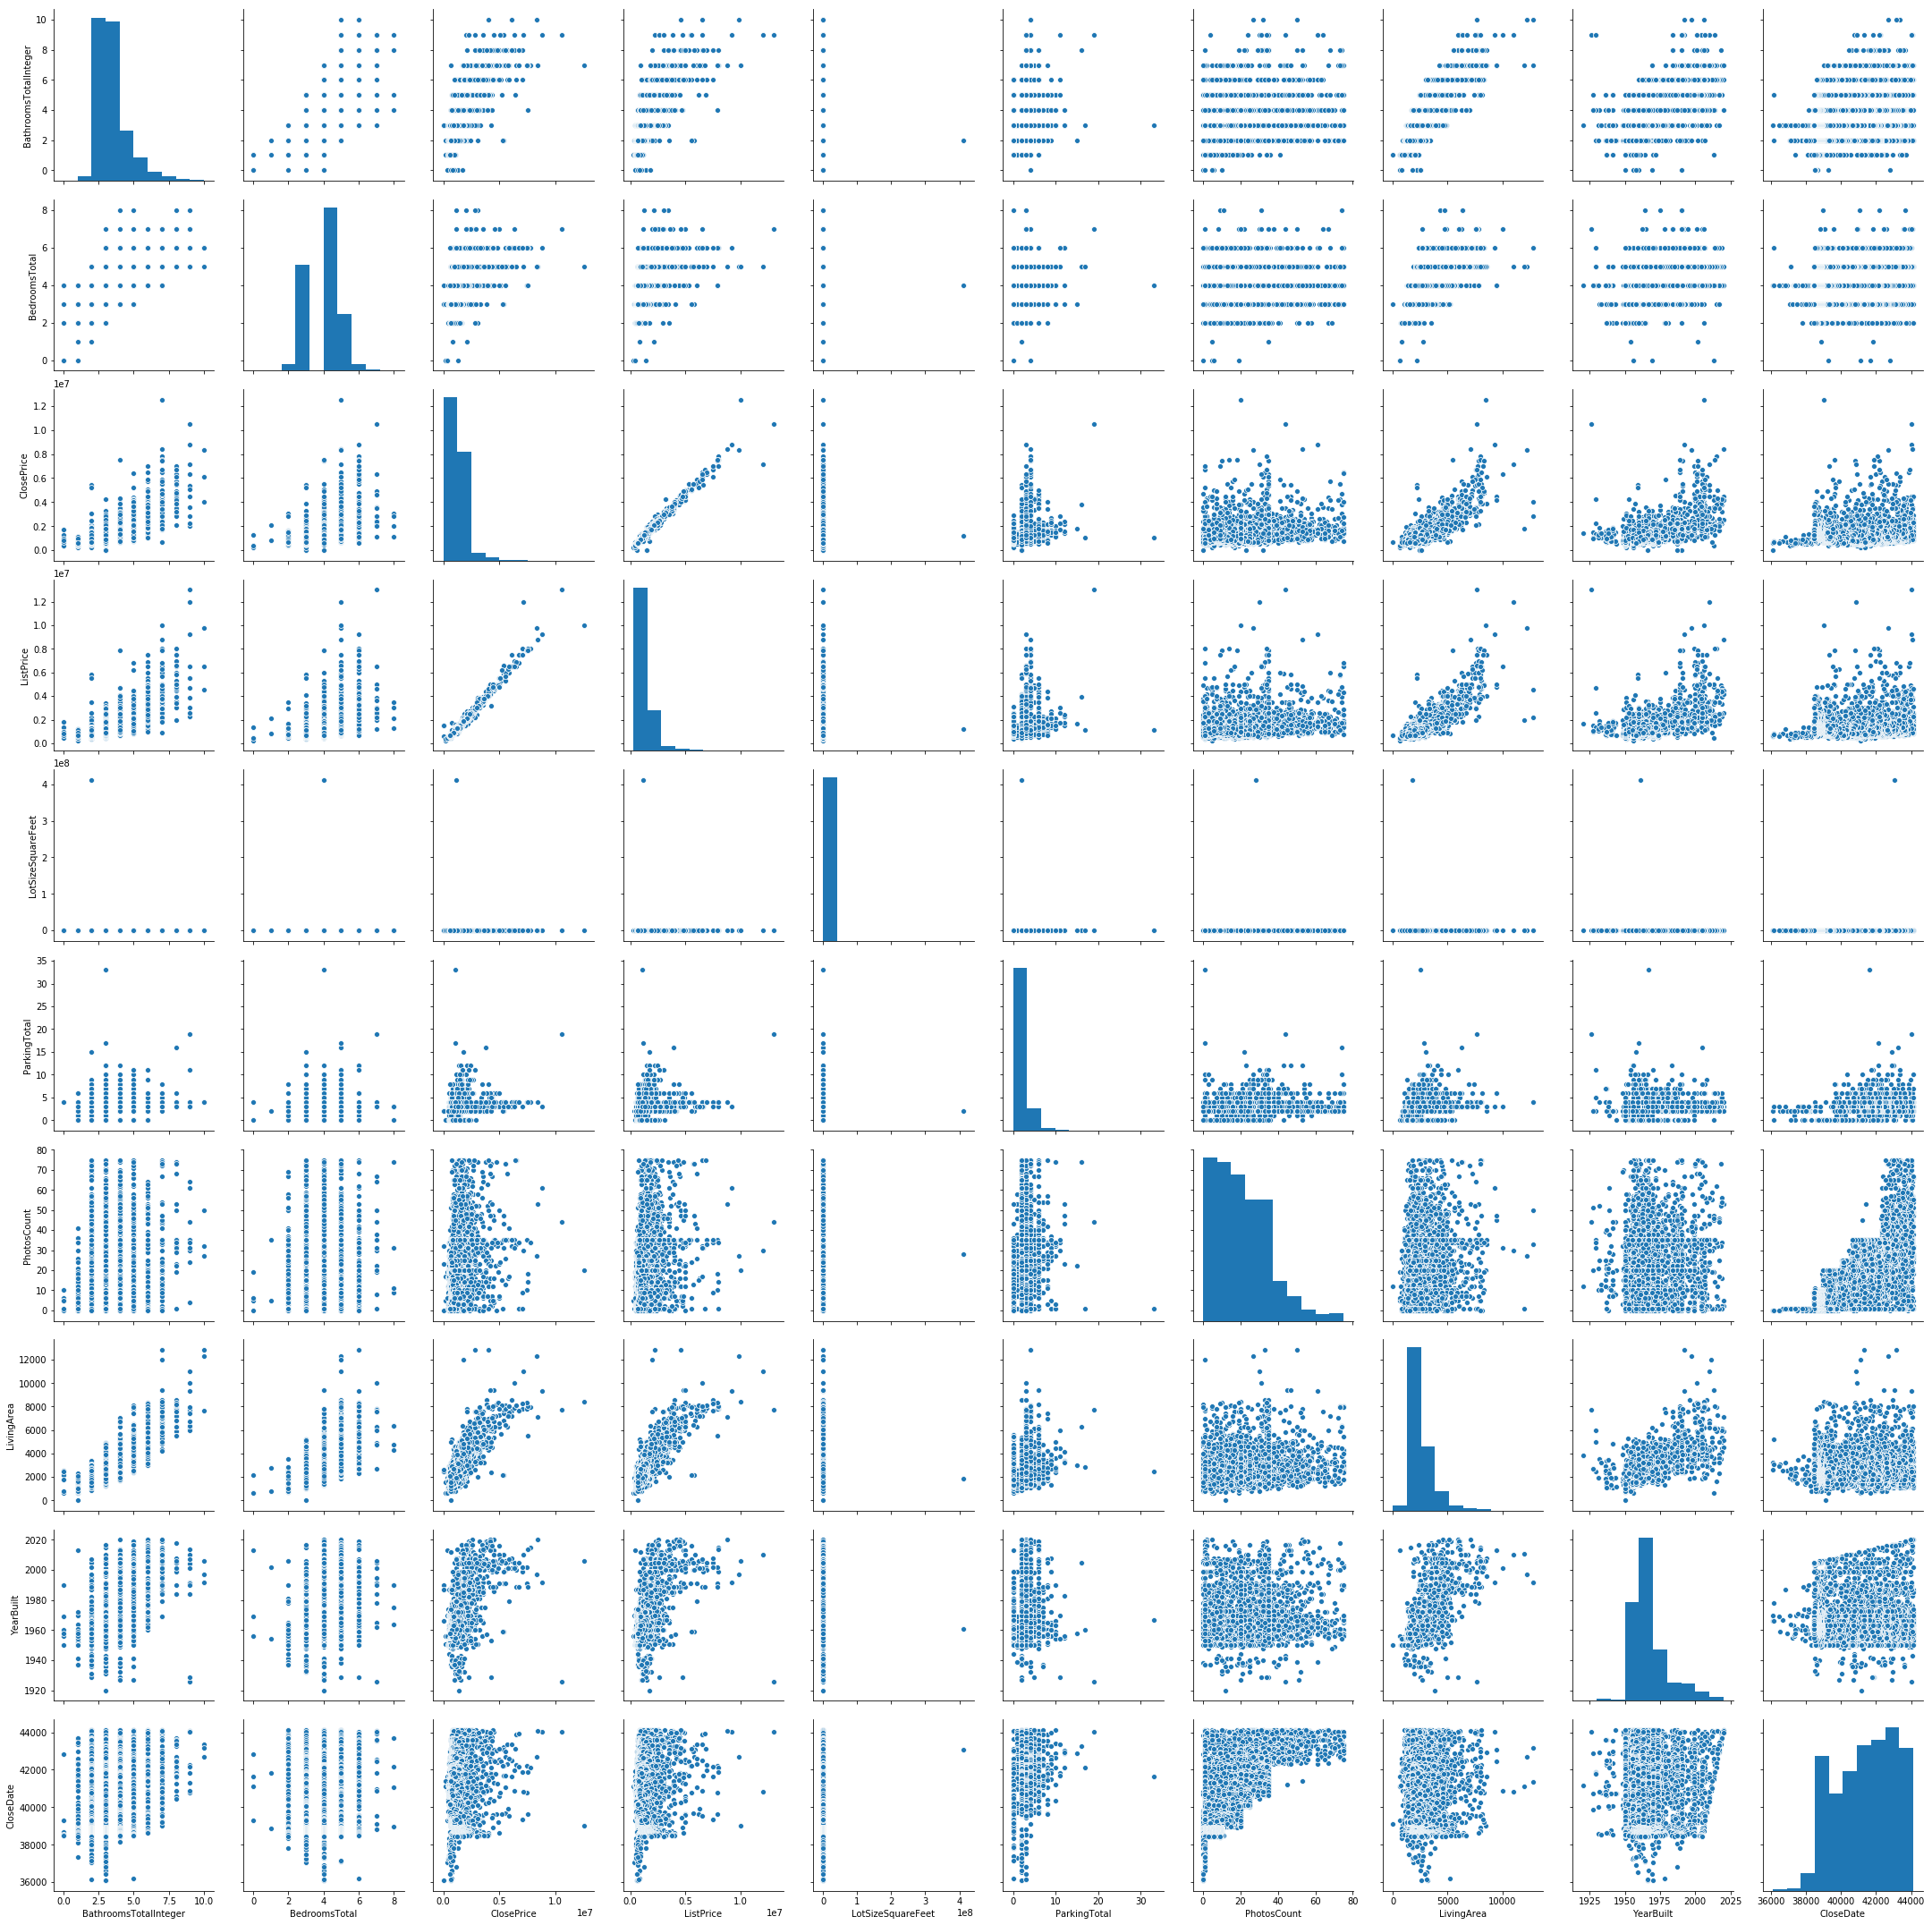

In [25]:
sns.pairplot(sales[numerical], height = 3)
plt.show()
# edaplot = sns.pairplot(sales[numerical], height = 3)
# edaplot.savefig('eda.png') #exporting the graphs as a png

In [ ]:
# edaplot = sns.pairplot(sales[categorical], height = 3)
# plt.show()

## Correlation Analysis

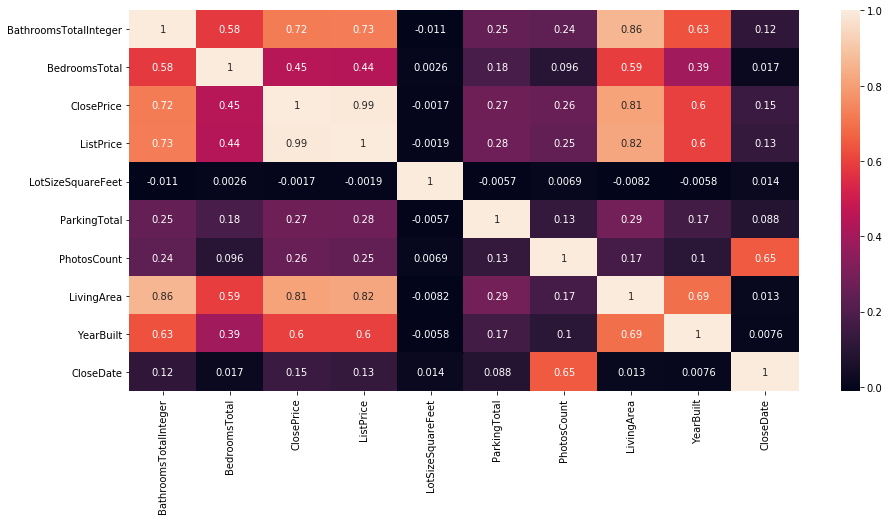

In [32]:
#using pearson's correlation for continuous variabes 
corr = sales[numerical].corr()
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
# plt.savefig('correlation.png') #export the matrix as a png

#notes: based off of the pairplots and pearson heat map below, it would make sense to remove the "List Price".
#BathroomsTotalInteger has a strong correltion with the BedroomsTotal and the Living Area. May remove 
#BedroomsTotal because they are exhibit pairwise correlation

In [27]:
numerical = [
'BathroomsTotalInteger',
# 'BedroomsTotal',
'ClosePrice',
'LotSizeSquareFeet',
'ParkingTotal',
'PhotosCount',
'LivingArea',
'YearBuilt',
'CloseDate',
]

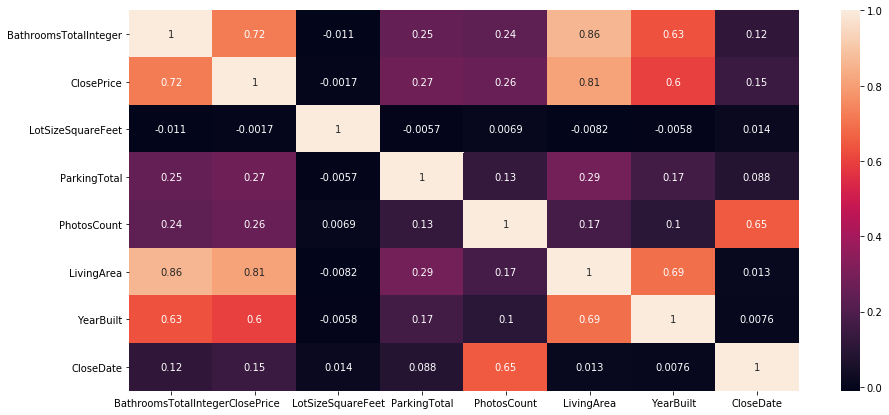

In [29]:
corr = sales[numerical].corr()
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

#notes: pairwise correlation between YearBuilt + BathroomsTotalInteger & PhotosCount + CloseDate.
#may remove lotsizeSquarefeet since it does not seem to have a correlation with the ClosePrice.

In [7]:
#Final list of continous variables:

numerical = [
'BathroomsTotalInteger',
# 'BedroomsTotal',
'ClosePrice',
# 'LotSizeSquareFeet',
'ParkingTotal',
'PhotosCount',
'LivingArea',
'YearBuilt',
# 'CloseDate',
]

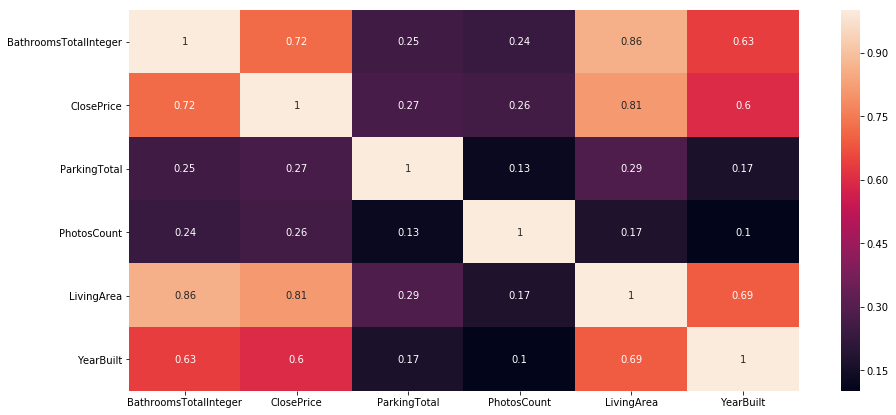

In [34]:
corr = sales[numerical].corr()
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

#notes: BathroomsTotalInteger + Living

# Categorical Association Analysis

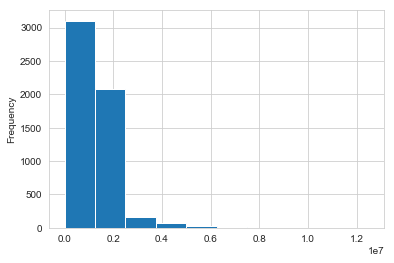

In [38]:
#in order for us to do an association analysis between categorical variable and the target variable,
#both the "X" and "y" variables need to be categorical. In our case, the target variable is a continous 
#variable, but it can be turned into a categorical by simply putting the values into "buckets" or bins.


#histogram of the ClosePrice variable to get an idea of the distribution
sns.set_style('whitegrid')
sales.ClosePrice.plot(kind = 'hist')

In [14]:
#creating 10 buckets for the ClosePirce
sales['quantile_closePrice'] = pd.qcut(sales['ClosePrice'], q = 10, precision = 0) 

In [15]:
sales.quantile_closePrice.value_counts()

(1175000.0, 1275000.0]     564
(1072800.0, 1175000.0]     551
(1275000.0, 1400000.0]     548
(-1.0, 779000.0]           548
(879000.0, 970000.0]       546
(1929200.0, 12500000.0]    545
(1580040.0, 1929200.0]     545
(779000.0, 879000.0]       545
(970000.0, 1072800.0]      541
(1400000.0, 1580040.0]     516
Name: quantile_closePrice, dtype: int64

In [65]:
sales['quantile_closePrice'] = sales['quantile_closePrice'].astype('str')

In [68]:
categorical.append('quantile_closePrice')

In [53]:
#This is open source code someone created, you can use the same one I am using by simply installing it through pip or Anaconda 
#for pip installation use: pip install git+https://github.com/shakedzy/dython.git

from dython.nominal import associations 

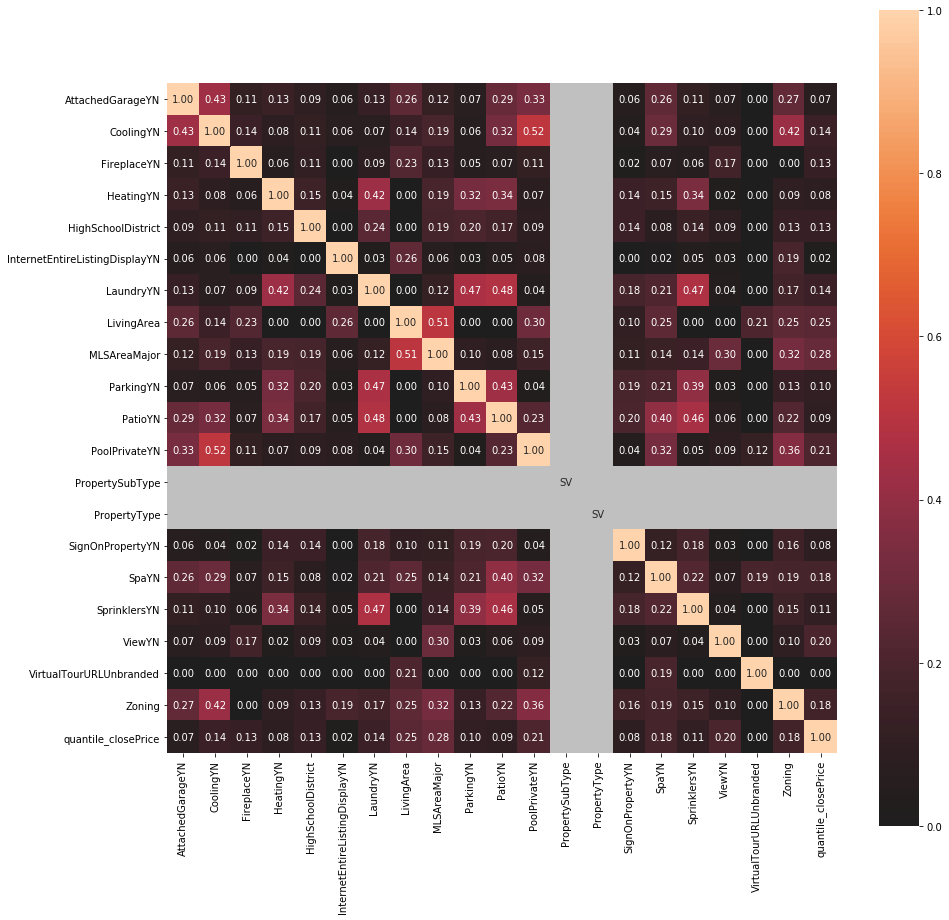

{'corr':                                 AttachedGarageYN  CoolingYN  FireplaceYN  \
 AttachedGarageYN                        1.000000   0.434250     0.112820   
 CoolingYN                               0.434250   1.000000     0.143989   
 FireplaceYN                             0.112820   0.143989     1.000000   
 HeatingYN                               0.133459   0.078697     0.060227   
 HighSchoolDistrict                      0.094931   0.110740     0.105004   
 InternetEntireListingDisplayYN          0.057644   0.064320     0.000000   
 LaundryYN                               0.130392   0.067277     0.091173   
 LivingArea                              0.257319   0.144531     0.225115   
 MLSAreaMajor                            0.119315   0.193622     0.129619   
 ParkingYN                               0.068032   0.060280     0.046935   
 PatioYN                                 0.285312   0.320493     0.065840   
 PoolPrivateYN                           0.331742   0.522251     0.1

In [69]:
#measuring the association between categorical variables using Cramer's V.
#similar to correlation, the output ranges from 0 to 1, where 0 means no association
#and 1 means 100% associated. However, unlike a correlation, there's no such thing
#as a negative association. It is either associated or isn't associated.
#Keep in mind, that Cramer's V is symmetrical, therefore it is insensitive to swapping
#s and y.

associations(sales[categorical], theil_u = False, figsize=(15,15))

#notes:in gneral most of the categorical variables do not have a strong association with the target variable,
#There are associations between other categorical variables though..
#With this, we can make note of which categorical variables to remove from our data set since they don't have
#much association to the target variable, like Vritual Tour, or Internet Listing Display

In [ ]:
#measuring the association between categorical variables using Theil's U, aka te Uncertainty Coefficient
#Above, I had used Cramer's V however only using Cramer V we lost some valuable information due to the curse of symmetry!
#Given the value of x, how many possible states does y have, and how often do they occcur?

#Example of how this is different than Cramer's V. Notice above CoolingYN has a 0.43 association with the ClosePrice and 
#it is the same no matter if we swap te x and y. But below, you'll notice that the CoolingYN and ClosePrice have different
#association vaues when the positions are swapped. This gives us more information on the true relations between the variables

#this is just another way to view association between categorical variables.

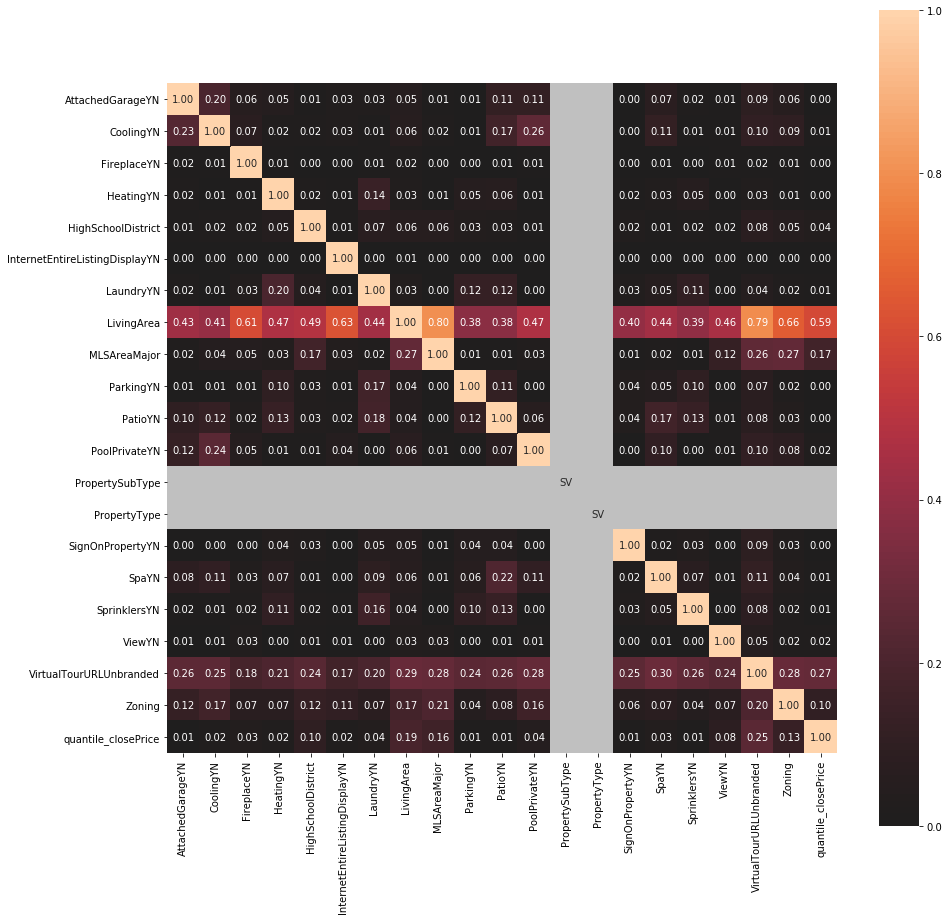

{'corr':                                 AttachedGarageYN  CoolingYN  FireplaceYN  \
 AttachedGarageYN                        1.000000   0.196742     0.061710   
 CoolingYN                               0.233213   1.000000     0.071219   
 FireplaceYN                             0.015353   0.014948     1.000000   
 HeatingYN                               0.019737   0.006402     0.014658   
 HighSchoolDistrict                      0.012837   0.018447     0.018135   
 InternetEntireListingDisplayYN          0.001998   0.001740     0.000816   
 LaundryYN                               0.018986   0.006827     0.032378   
 LivingArea                              0.431736   0.410261     0.608186   
 MLSAreaMajor                            0.022334   0.040910     0.045812   
 ParkingYN                               0.005731   0.005350     0.011955   
 PatioYN                                 0.098522   0.124974     0.024479   
 PoolPrivateYN                           0.123507   0.243119     0.0

In [70]:
associations(sales[categorical], theil_u = True, figsize=(15,15))

In [72]:
categorical = [
#'AttachedGarageYN',
'CoolingYN',
'FireplaceYN',
#'HeatingYN',
'HighSchoolDistrict',
'LaundryYN',
'LivingArea',
'MLSAreaMajor',
'ParkingYN',
#'PatioYN',
'PoolPrivateYN',
#'SignOnPropertyYN',
'SpaYN',
'SprinklersYN',
'ViewYN',
'Zoning',
'quantile_closePrice'
]

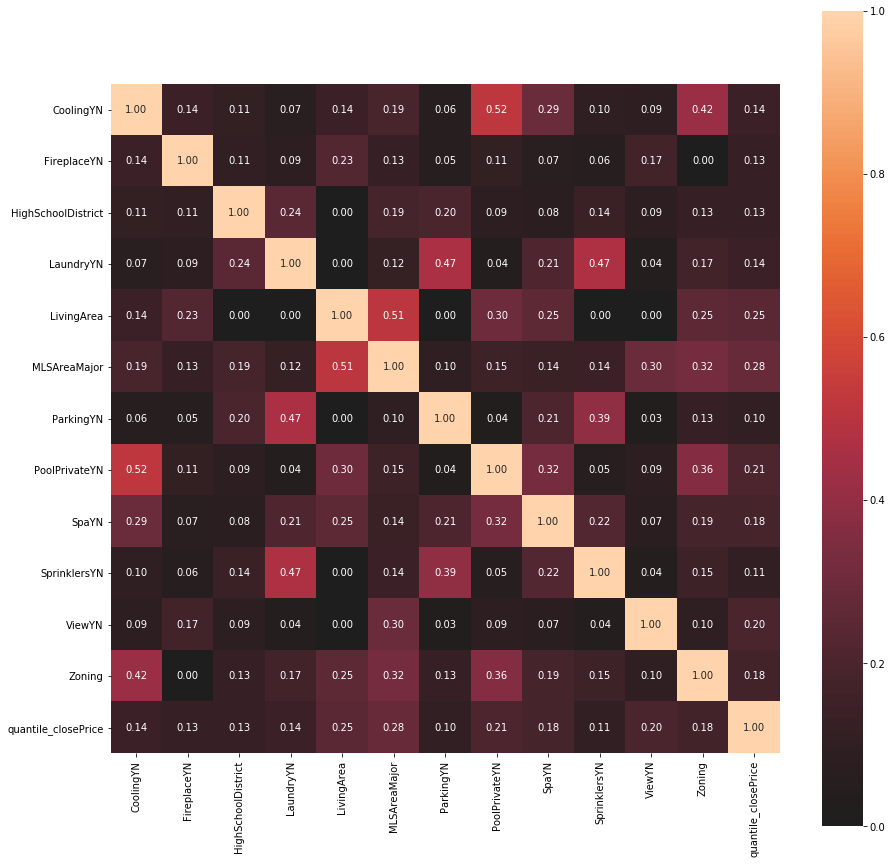

{'corr':                      CoolingYN  FireplaceYN  HighSchoolDistrict  LaundryYN  \
 CoolingYN             1.000000     0.143989            0.110740   0.067277   
 FireplaceYN           0.143989     1.000000            0.105004   0.091173   
 HighSchoolDistrict    0.110740     0.105004            1.000000   0.244204   
 LaundryYN             0.067277     0.091173            0.244204   1.000000   
 LivingArea            0.144531     0.225115            0.000000   0.000000   
 MLSAreaMajor          0.193622     0.129619            0.185400   0.123561   
 ParkingYN             0.060280     0.046935            0.202239   0.465223   
 PoolPrivateYN         0.522251     0.112121            0.090202   0.039915   
 SpaYN                 0.293632     0.065981            0.076596   0.214729   
 SprinklersYN          0.097611     0.056832            0.138860   0.473266   
 ViewYN                0.093349     0.174047            0.085262   0.042947   
 Zoning                0.419384     0.000000

In [73]:
#round 2 after removing categorical variables
associations(sales[categorical], theil_u = False, figsize=(15,15)) #cramer's V

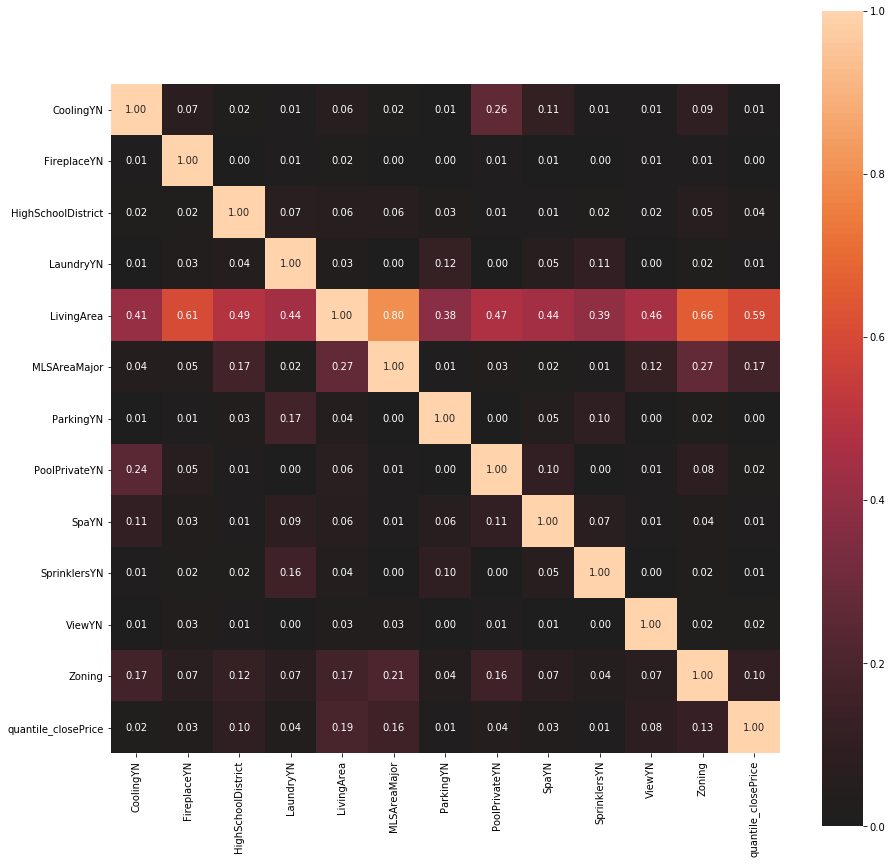

{'corr':                      CoolingYN  FireplaceYN  HighSchoolDistrict  LaundryYN  \
 CoolingYN             1.000000     0.071219            0.023133   0.013005   
 FireplaceYN           0.014948     1.000000            0.004773   0.012946   
 HighSchoolDistrict    0.018447     0.018135            1.000000   0.066444   
 LaundryYN             0.006827     0.032378            0.043740   1.000000   
 LivingArea            0.410261     0.608186            0.490401   0.441995   
 MLSAreaMajor          0.040910     0.045812            0.168182   0.017610   
 ParkingYN             0.005350     0.011955            0.029635   0.167372   
 PoolPrivateYN         0.243119     0.050753            0.014703   0.003740   
 SpaYN                 0.105728     0.028043            0.009470   0.092772   
 SprinklersYN          0.011514     0.017647            0.021127   0.161244   
 ViewYN                0.007503     0.027828            0.009825   0.003681   
 Zoning                0.171336     0.067582

In [74]:
associations(sales[categorical], theil_u = True, figsize=(15,15)) #Theil's U

In [75]:
#round 3
categorical = [
#'AttachedGarageYN',
#'CoolingYN',
#'FireplaceYN',
#'HeatingYN',
'HighSchoolDistrict',
#'LaundryYN',
'LivingArea',
'MLSAreaMajor',
#'ParkingYN',
#'PatioYN',
#'PoolPrivateYN',
#'SignOnPropertyYN',
#'SpaYN',
#'SprinklersYN',
#'ViewYN',
'Zoning',
'quantile_closePrice'
]

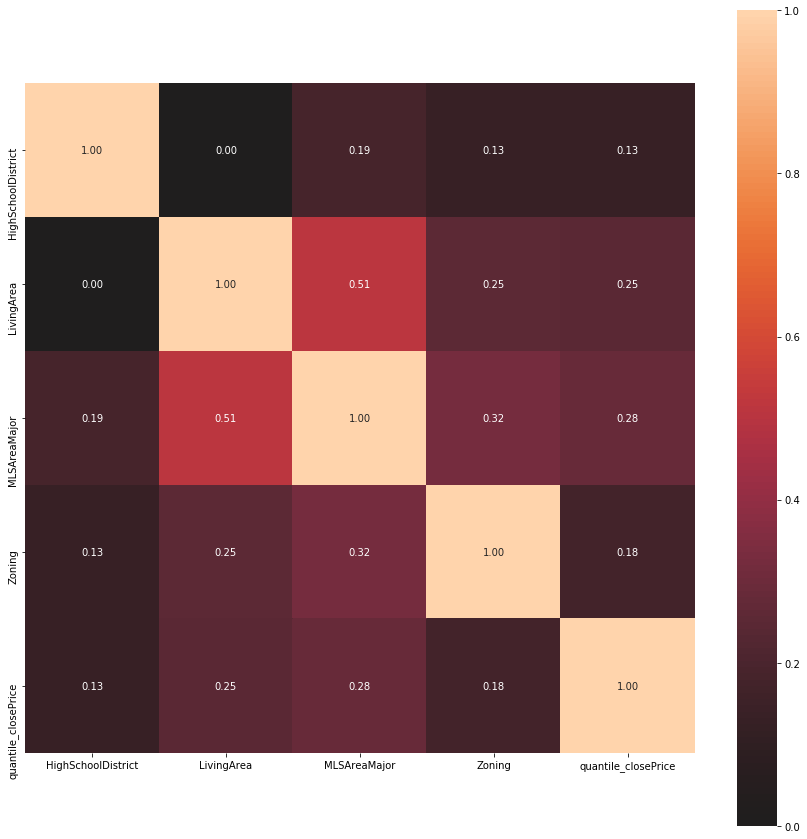

{'corr':                      HighSchoolDistrict  LivingArea  MLSAreaMajor    Zoning  \
 HighSchoolDistrict             1.000000    0.000000      0.185400  0.127161   
 LivingArea                     0.000000    1.000000      0.508218  0.251276   
 MLSAreaMajor                   0.185400    0.508218      1.000000  0.324068   
 Zoning                         0.127161    0.251276      0.324068  1.000000   
 quantile_closePrice            0.131443    0.249254      0.282151  0.175831   
 
                      quantile_closePrice  
 HighSchoolDistrict              0.131443  
 LivingArea                      0.249254  
 MLSAreaMajor                    0.282151  
 Zoning                          0.175831  
 quantile_closePrice             1.000000  ,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x1ca5fbec9b0>}

In [76]:
associations(sales[categorical], theil_u = False, figsize=(15,15)) #cramer's V

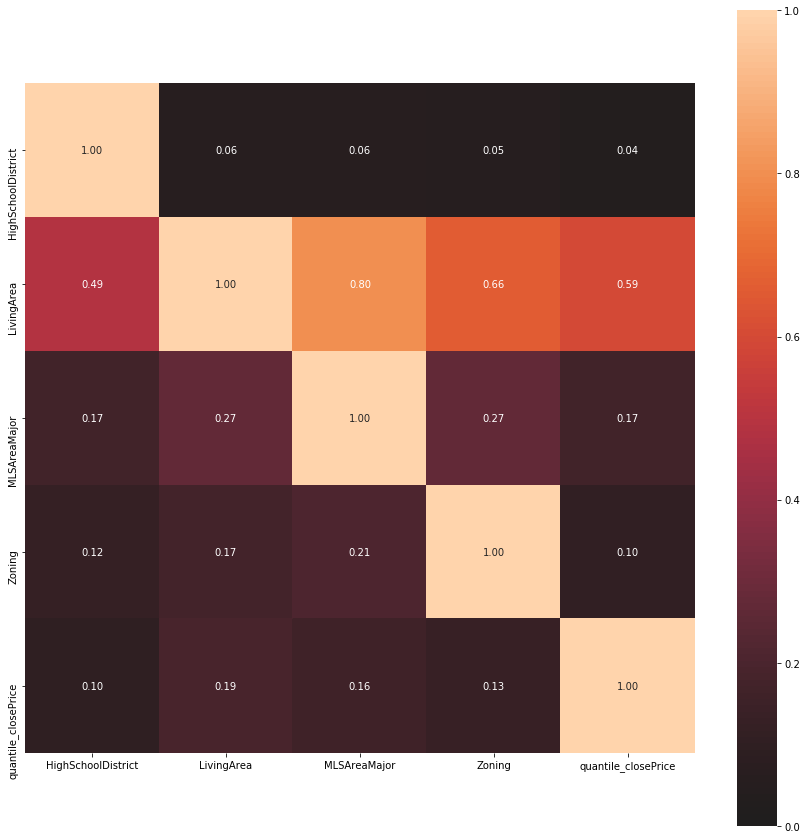

{'corr':                      HighSchoolDistrict  LivingArea  MLSAreaMajor    Zoning  \
 HighSchoolDistrict             1.000000    0.057157      0.057783  0.054248   
 LivingArea                     0.490401    1.000000      0.797535  0.659269   
 MLSAreaMajor                   0.168182    0.270550      1.000000  0.269186   
 Zoning                         0.123137    0.174415      0.209931  1.000000   
 quantile_closePrice            0.098504    0.193885      0.160288  0.128548   
 
                      quantile_closePrice  
 HighSchoolDistrict              0.035179  
 LivingArea                      0.594101  
 MLSAreaMajor                    0.166615  
 Zoning                          0.104208  
 quantile_closePrice             1.000000  ,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x1ca5f0af128>}

In [77]:
associations(sales[categorical], theil_u = True, figsize=(15,15)) #Theil's U

## Looking at how complete the data is

In [27]:
#calculating percent of missing data 
percent_missing = test.isnull().sum() * 100 / len(test)
missing_value_df = pd.DataFrame({'column_name': test.columns,
                                 'percent_missing': percent_missing})
missing_value_df.reset_index(drop = True, inplace = True)
# missing_value_df.sort_values()

In [28]:
missing_value_df.sort_values('percent_missing', inplace = True)

In [29]:
missing_value_df #this is without removing anything

,column_name,percent_missing
16,ListPrice,0.000000
38,StreetNumberNumeric,0.000000
29,PropertyType,0.000000
28,PropertySubType,0.000000
25,PhotosCount,0.000000
36,StreetName,0.000000
13,InternetEntireListingDisplayYN,0.000000
9,CountyOrParish,0.000000
33,StateOrProvince,0.000000
1,BathroomsTotalInteger,0.000000


In [83]:
final_columns = categorical + numerical

In [84]:
final_columns.append('ParcelNumber')

In [85]:
final_columns

['HighSchoolDistrict',
 'LivingArea',
 'MLSAreaMajor',
 'Zoning',
 'quantile_closePrice',
 'BathroomsTotalInteger',
 'ClosePrice',
 'ParkingTotal',
 'PhotosCount',
 'LivingArea',
 'YearBuilt',
 'ParcelNumber']

In [87]:
percent_missing = sales[final_columns].isnull().sum() * 100 / len(test)
missing_value_df = pd.DataFrame({'column_name': final_columns,
                                 'percent_missing': percent_missing})
missing_value_df.reset_index(drop = True, inplace = True)

In [88]:
missing_value_df.sort_values('percent_missing', inplace = True)

In [89]:
missing_value_df

,column_name,percent_missing
0,HighSchoolDistrict,0.000000
1,LivingArea,0.000000
2,MLSAreaMajor,0.000000
3,Zoning,0.000000
4,quantile_closePrice,0.000000
5,BathroomsTotalInteger,0.000000
8,PhotosCount,0.000000
9,LivingArea,0.000000
11,ParcelNumber,0.000000
6,ClosePrice,0.018349


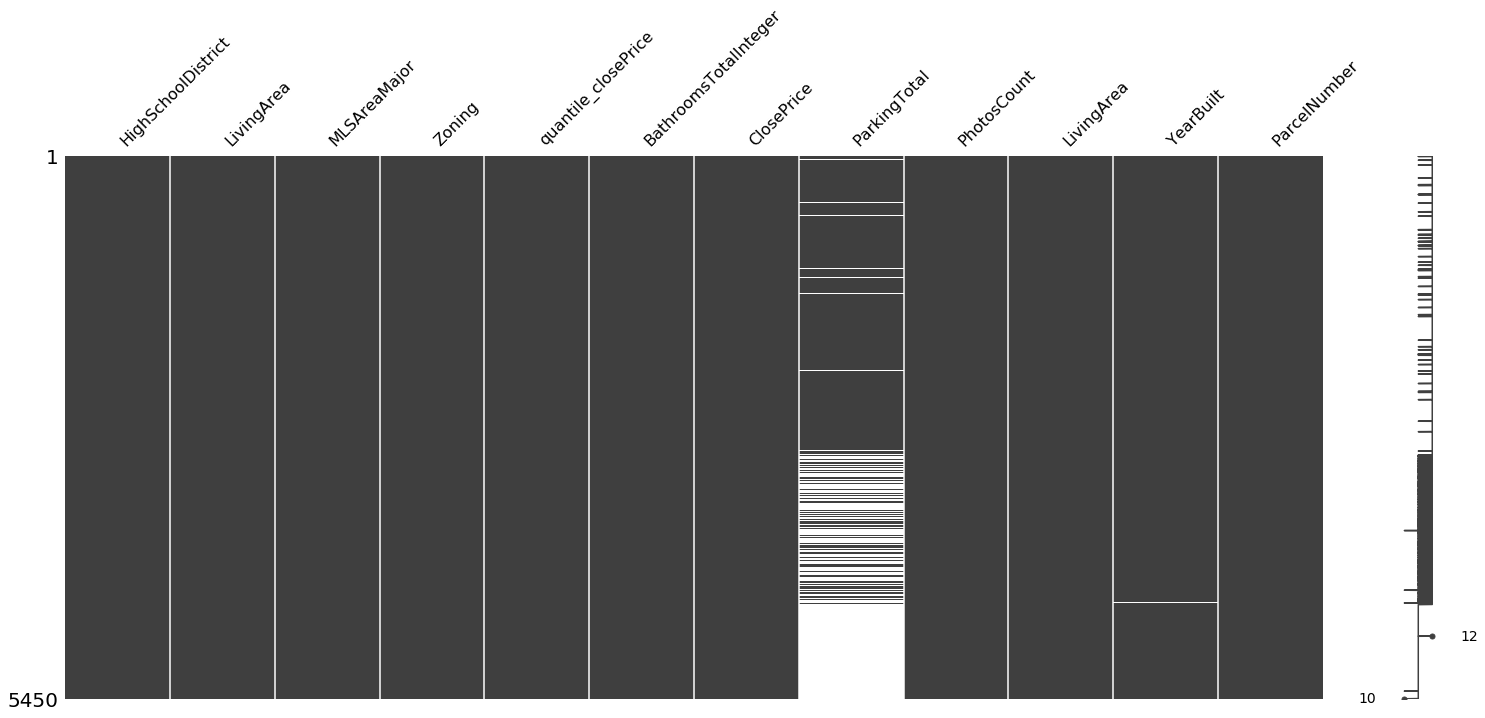

In [90]:
import missingno as msno
msno.matrix(sales[final_columns])

In [91]:
sales[final_columns].to_pickle('sales_reduced_columns.pkl')